# Instructions and Rules
- **Answering questions**: For each question, the notebook contains **scoring cells** and **submission cells**. You should modify the submission cells to solve the question. Only the modifications made to the submission cells will be used to grade your submission. You can run the scoring cells to compute your score for the question.

  You may wish to modify some scoring cells in order to change the length of time it takes to compute your score. However, note that the final score will be computed using the unmodified scoring cell, so \textbf{check} that your code runs with the unmodified scoring cells before submitting your final notebook.
- **Notebok submissions**: At the end of the hackathon your complete notebook should be sent to [peter.brown@telecom-paris.fr](mailto:peter.brown@telecom-paris.fr) **before 12h on Friday 07/02**. Please respect this deadline as we need time to grade your submissions before 15h the same day.

  Submissions will be tested in a separate notebook with the submissions cells copied over from your submission. Please check that your submission works with the original, unmodified. scoring cells before submitting!   Consider restarting the kernel and/or copying the submission cells into a clean notebook to test your submission before you send it in for marking!
    Note, if we cannot get part of your submission to run, you will receive 0 points for that question.
- **Results session**: The results of the hackathon and the prizes will be distributed in 0B03 at 15h-17h. We will also discuss the solutions to the questions during this session.
- **Randomness in marking**: For any question whose marking criteria involves a random choice, the same random seed will be used for all teams during the marking process.
- **Question scoring**: For each question, teams will be ranked according to the marking criteria of the question, tiebreakers are explained within each question. If there are $n$ teams then first rank will receive $n$ points, second rank $n-1$ points and so on. If two teams receive the same rank (after tiebreakers) then they will both receive the larger number of points. Here is an example
  | Team number | Score (higher better) | Rank | Points |
  | --- | --- | --- | --- |
  | 1 | 0.8 | 3 | 3 |
  | 2 | 1.0 | 1 | 5 |
  | 3 | 0.8 | 3 | 3 |
  | 4 | 0.75 | 5 | 1 |
  | 5 | 1.0 | 1 | 5 |
  
Floating point scores will be rounded to 3 decimal places and then compared.  
- **Queries about Hackathon questions**: If your team has issues with a Hackathon question, an email can be sent to [peter.brown@telecom-paris.fr](mailto:peter.brown@telecom-paris.fr). If your question can be answered then the question and answer will be posted to the Ecampus discussion boards for all teams to observe.
- **Have a go**: Some of the questions are not so easy, so don't worry if you don't find the optimal solution right away. However, most questions have been designed with a continuous score, so even if you don't solve the question perfectly all of your progress can be meaningfully quantified.
- **Hackathon scoring**: Once all submissions have been marked, each team's total points will be calculated and the final rankings will be obtained. 

    In the event that 1st place is tied, we will try to separate the teams by the number of first place finishes on the questions, then number of second place finishes, etc. If this does not separate the teams, a tiebreaker question will be used to decide the winner during the results session on Friday afternoon.
- **Final note for CCSC_3EL07_TP**: You will be graded as a team. Your results in the hackathon will form only 25% of your final grade. The remaining 75% will come from a report, submitted as a team, that explains your approach and reasoning behind your submissions to each question in the hackathon. The report should be short, roughly 1/2 page per question and no longer than 10 pages. The report may be written in French or English and can be typed or handwritten. Please make sure the reports are legible. Please do not use AI tools e.g. ChatGPT to write your report, we'll notice. Your team's report should be sent to [peter.brown@telecom-paris.fr](mailto:peter.brown@telecom-paris.fr) by **Friday 14 February**.

In [9]:
# A different seed will be used to test your code
SEED = 42

# 1. Biased random number generation

One of the first commercial applications of quantum theory was random number generation. For example, if we measure a $\ket{+}$ state in the computational basis then we get a uniformly random bit. The goal of this question is to design a two-bit quantum random number generator with a particular distribution.

More specifically, you should design a two-qubit circuit that, when measured in the computational basis, produces a two-bit outcome $\left(x_0,x_1\right)$ according to the distribution:
$$p\left(x_0,x_1\right) = \begin{cases}
            0 \qquad &\text{if } \left(x_0,x_1\right) \in \{(0,0), (1,1)\} \\
            \frac13 \qquad &\text{if } \left(x_0,x_1\right)=(0,1) \\
            \frac23 \qquad &\text{if } \left(x_0,x_1\right)=(1,0)
        \end{cases}$$

You don't have to (and mustn't) add measurement gates to your circuit, the test function will take care of this. Be careful about Qiskit's little-endian convention! Remember that the qubit numbered $0$, which upon measuring will give $x_0$, is the top one.

### Marking criteria
Let $C$ be the two-qubit circuit you submit, let $q$ be the two-bit distribution that it produces. Your submission will be scored as 
$$1-\Delta(p,q)$$         
where $\Delta(p,q) = \frac12\sum\limits_y |p(y)-q(y)|$ is the statistical distance.

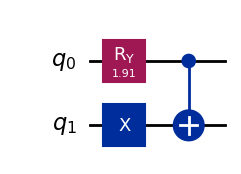

In [10]:
# SUBMISSION CELL

from qiskit import QuantumCircuit
import numpy as np

angle = 2*np.acos(np.sqrt(1/3))

qc = QuantumCircuit(2)
qc.ry(angle, 0)
qc.x(1)
qc.cx(0,1)
qc.draw("mpl")


In [11]:
# SCORING CELL

import numpy as np
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector

def test_biased_rng(qc: QuantumCircuit) -> float:
    resulting_distribution = np.abs(Statevector(qc).data) ** 2
    desired_distribution = np.array([0., 2., 1., 0.]) / 3

    return 1 - np.abs(resulting_distribution - desired_distribution).sum() / 2

print(f"Score: {test_biased_rng(qc):.3f}")

Score: 1.000


# 2. La diagonale des fous

Let us denote
$$\alpha=\frac{-1+\mathrm{i}}{\sqrt{2}},\quad\beta=-\mathrm{i},\quad\gamma=\frac{1+\mathrm{i}}{\sqrt{2}}\,.$$
Your goal is to create a quantum circuit that implements the following unitary
$$U=\begin{pmatrix}
1&0&0&0&0&0&0&0\\
0&\alpha&0&0&0&0&0&0\\
0&0&\alpha&0&0&0&0&0\\
0&0&0&\beta&0&0&0&0\\
0&0&0&0&\alpha&0&0&0\\
0&0&0&0&0&\beta&0&0\\
0&0&0&0&0&0&\beta&0\\
0&0&0&0&0&0&0&\gamma\\
\end{pmatrix}$$

### Marking criteria
Your `QuantumCircuit` must only use single-qubit rotations and `cx` gates. If we denote $V$ the unitary that your quantum circuit implements, then the error is defined as
$$\max_{\ket{\psi}}\|(U-\mathrm{e}^{i\theta}V)\ket{\psi}\|_2\leqslant10^{-6}$$
where the optimisation is over all possible 3-qubit states, and theta is such that $\mathrm{e}^{i\theta}V_{0, 0}$ is a real number. Your score is the approximation error, lowr is better. In case of a tie, the tiebreaker will be
$$10n_{\text{cx}}+n_u\,,$$
with $n_{\text{cx}}$ being the number of `cx` gates in your circuit, and $n_u$ being the number of single-qubit rotation gates in your circuit, lower is better.

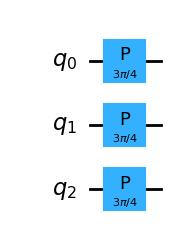

In [12]:
# SUBMISSION CELL

from qiskit import QuantumCircuit

qc = QuantumCircuit(3)
qc.p(3*np.pi/4, 0)
qc.p(3*np.pi/4, 1)
qc.p(3*np.pi/4, 2)
qc.draw("mpl")

In [13]:
# SCORING CELL

import numpy as np
from qiskit import QuantumCircuit
from qiskit.quantum_info import Operator

def test_diagonal_unitary(qc: QuantumCircuit) -> tuple[int, float]:
    assert qc.num_qubits == 3, "The circuit must be made of exactly 3 qubits."
    V = Operator(qc).data
    V /= np.exp(1j * np.angle(V[0, 0]))
    alpha = (-1 + 1j) / np.sqrt(2)
    beta = -1j
    gamma = (1 + 1j) / np.sqrt(2)
    U = np.diag([1, alpha, alpha, beta, alpha, beta, beta, gamma])
    error = np.linalg.norm(U - V, ord=2)

    ops = qc.decompose(reps=10).count_ops()
    score = 0
    
    if len(ops) > 2:
        raise ValueError(f"The circuit must only use CNOT and U gates ({ops=})")
    
    if len(ops) == 1:
        if "cx" not in ops and "u" not in ops:
            raise ValueError(f"Unknown operation: {ops}.")
        
        score = 10 * ops["cx"] if "cx" in ops else ops["u"]
    
    if len(ops) == 2:
        if "cx" not in ops or "u" not in ops:
            raise ValueError(f"One of these operation is unknown: {ops}.") 
        
        score = 10 * ops["cx"] + ops["u"]

    return error, score

error, score = test_diagonal_unitary(qc)
print(f"Approximation error: {error:.3f}. Tiebreaker: {score}.")

Approximation error: 0.000. Tiebreaker: 3.


# 3. One-time pad with additional information

You are given a qubit state that can be written as
$$\ket{\psi}=\frac{(-1)^{f(0)}}{\sqrt{2}}\ket{0}+\frac{(-1)^{f(1)\oplus b}}{\sqrt{2}}\ket{1}$$
for an unknown binary function $f : \{0,1\} \to \{0,1\}$ and an unknown bit $b \in \{0,1\}$. You can apply any unitary $U$ you want on this state and then measure it in the computational basis, but only once. After having obtained your measurement result $m$, $f$ will be given to you as a tuple `(f(0), f(1))` and you must then make a guess of the value of $b$ using your knowledge of $(m, f)$. Your goal is to recover $b$ with the highest probability possible.

### Marking criteria

Your code will be tested on each of the four possible functions $f$ and the two possible bits $b$. For each of these eight possible cases, we will compute the probability of you correctly guessing $b$. Your score will then be the average probability of winning, higher is better.

Your submission will consist of a quantum circuit, implementing the unitary $U$, and a function `guess` that takes in the measurement result and the function $f$ and returns the guess of $b$. Your quantum circuit mustn't use any measurement, they will be added by the test function, and all qubits will be measured.

Your quantum circuit can use an arbitrary (provided we can run the computation) number of ancilla qubits, in which case the circuit will take in the input state $\ket{\psi}\otimes\ket{0}^{n}$, with $n$ being the number of ancilla qubits.

In [14]:
# SUBMISSION CELL

from qiskit import QuantumCircuit

qc = QuantumCircuit(1)
qc.h(0)

def guess_otp(measurement_result: str, f: tuple[int, int]) -> int:
    m = int(measurement_result)
    return m^f[0]^f[1]

In [15]:
# SCORING CELL

from collections.abc import Callable
from itertools import product

import numpy as np
from qiskit import QuantumCircuit
from qiskit.primitives import StatevectorSampler
from tqdm.notebook import trange

def test_otp_with_additional_info(qc: QuantumCircuit, guess_otp: Callable[[str, tuple[int, int]], int], N: int = 1_000) -> float:
    sampler = StatevectorSampler(default_shots=1, seed=SEED)
    n_qubits = qc.num_qubits
    success = 0

    for _ in trange(N):
        for f0, f1, b in product([0, 1], repeat=3):
            final_qc = QuantumCircuit(n_qubits)
            final_qc.initialize(pow(-1, np.array([f0, f1 ^b])) / np.sqrt(2), 0)
            final_qc = final_qc.compose(qc, range(n_qubits))
            final_qc.measure_all()
            meas_result = list(sampler.run([final_qc]).result()[0].data.meas.get_counts().keys())[0]
            guessed_bit = guess_otp(meas_result, (f0, f1))
            success += guessed_bit == b

    return success / (8 * N)

print(f"Score: {test_otp_with_additional_info(qc, guess_otp):.3f}")

  0%|          | 0/1000 [00:00<?, ?it/s]

Score: 1.000


# 4. To C or not to C

As we saw during the TP, one of the challenging tasks when implementing a quantum computation is to take into account the connectivity of the qubits within the quantum computer. For this question, will will consider that we are working on the 27 qubit IBM Paris machine whose connectivity graph can be visualized using the following cell.

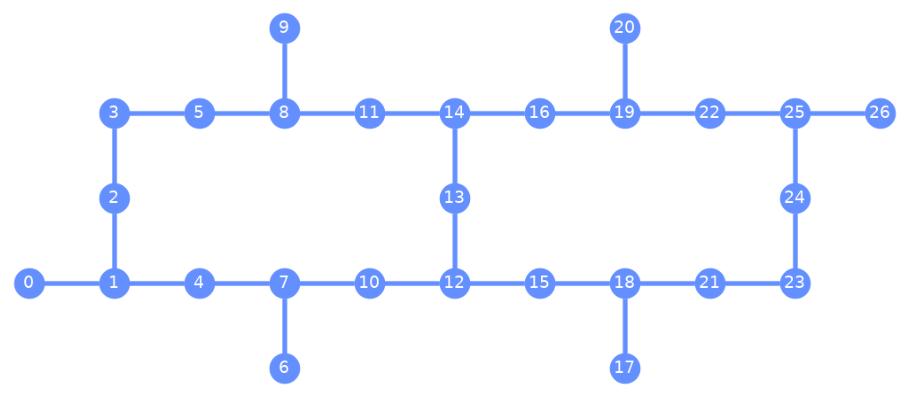

In [16]:
from qiskit_ibm_runtime.fake_provider import FakeParisV2
from qiskit.visualization import plot_gate_map

backend = FakeParisV2()
plot_gate_map(backend)

Our goal is to create the Bell state $\frac{\ket{00} + \ket{11}}{\sqrt{2}}$ between qubit $0$ and qubit $26$ on this machine. That is, the state of the whole machine should be
$$\frac{\ket{0} \otimes \ket{0}^{\otimes25} \otimes \ket{0}+\ket{1}\otimes\ket{0}^{\otimes25}\otimes\ket{1}}{\sqrt{2}}\,.$$

### Marking criteria

Your circuit will only be assigned a score if it produces the desired state. In this case, we will score your circuit by its **depth after transpiling for this particular backend**. A lower score is better.

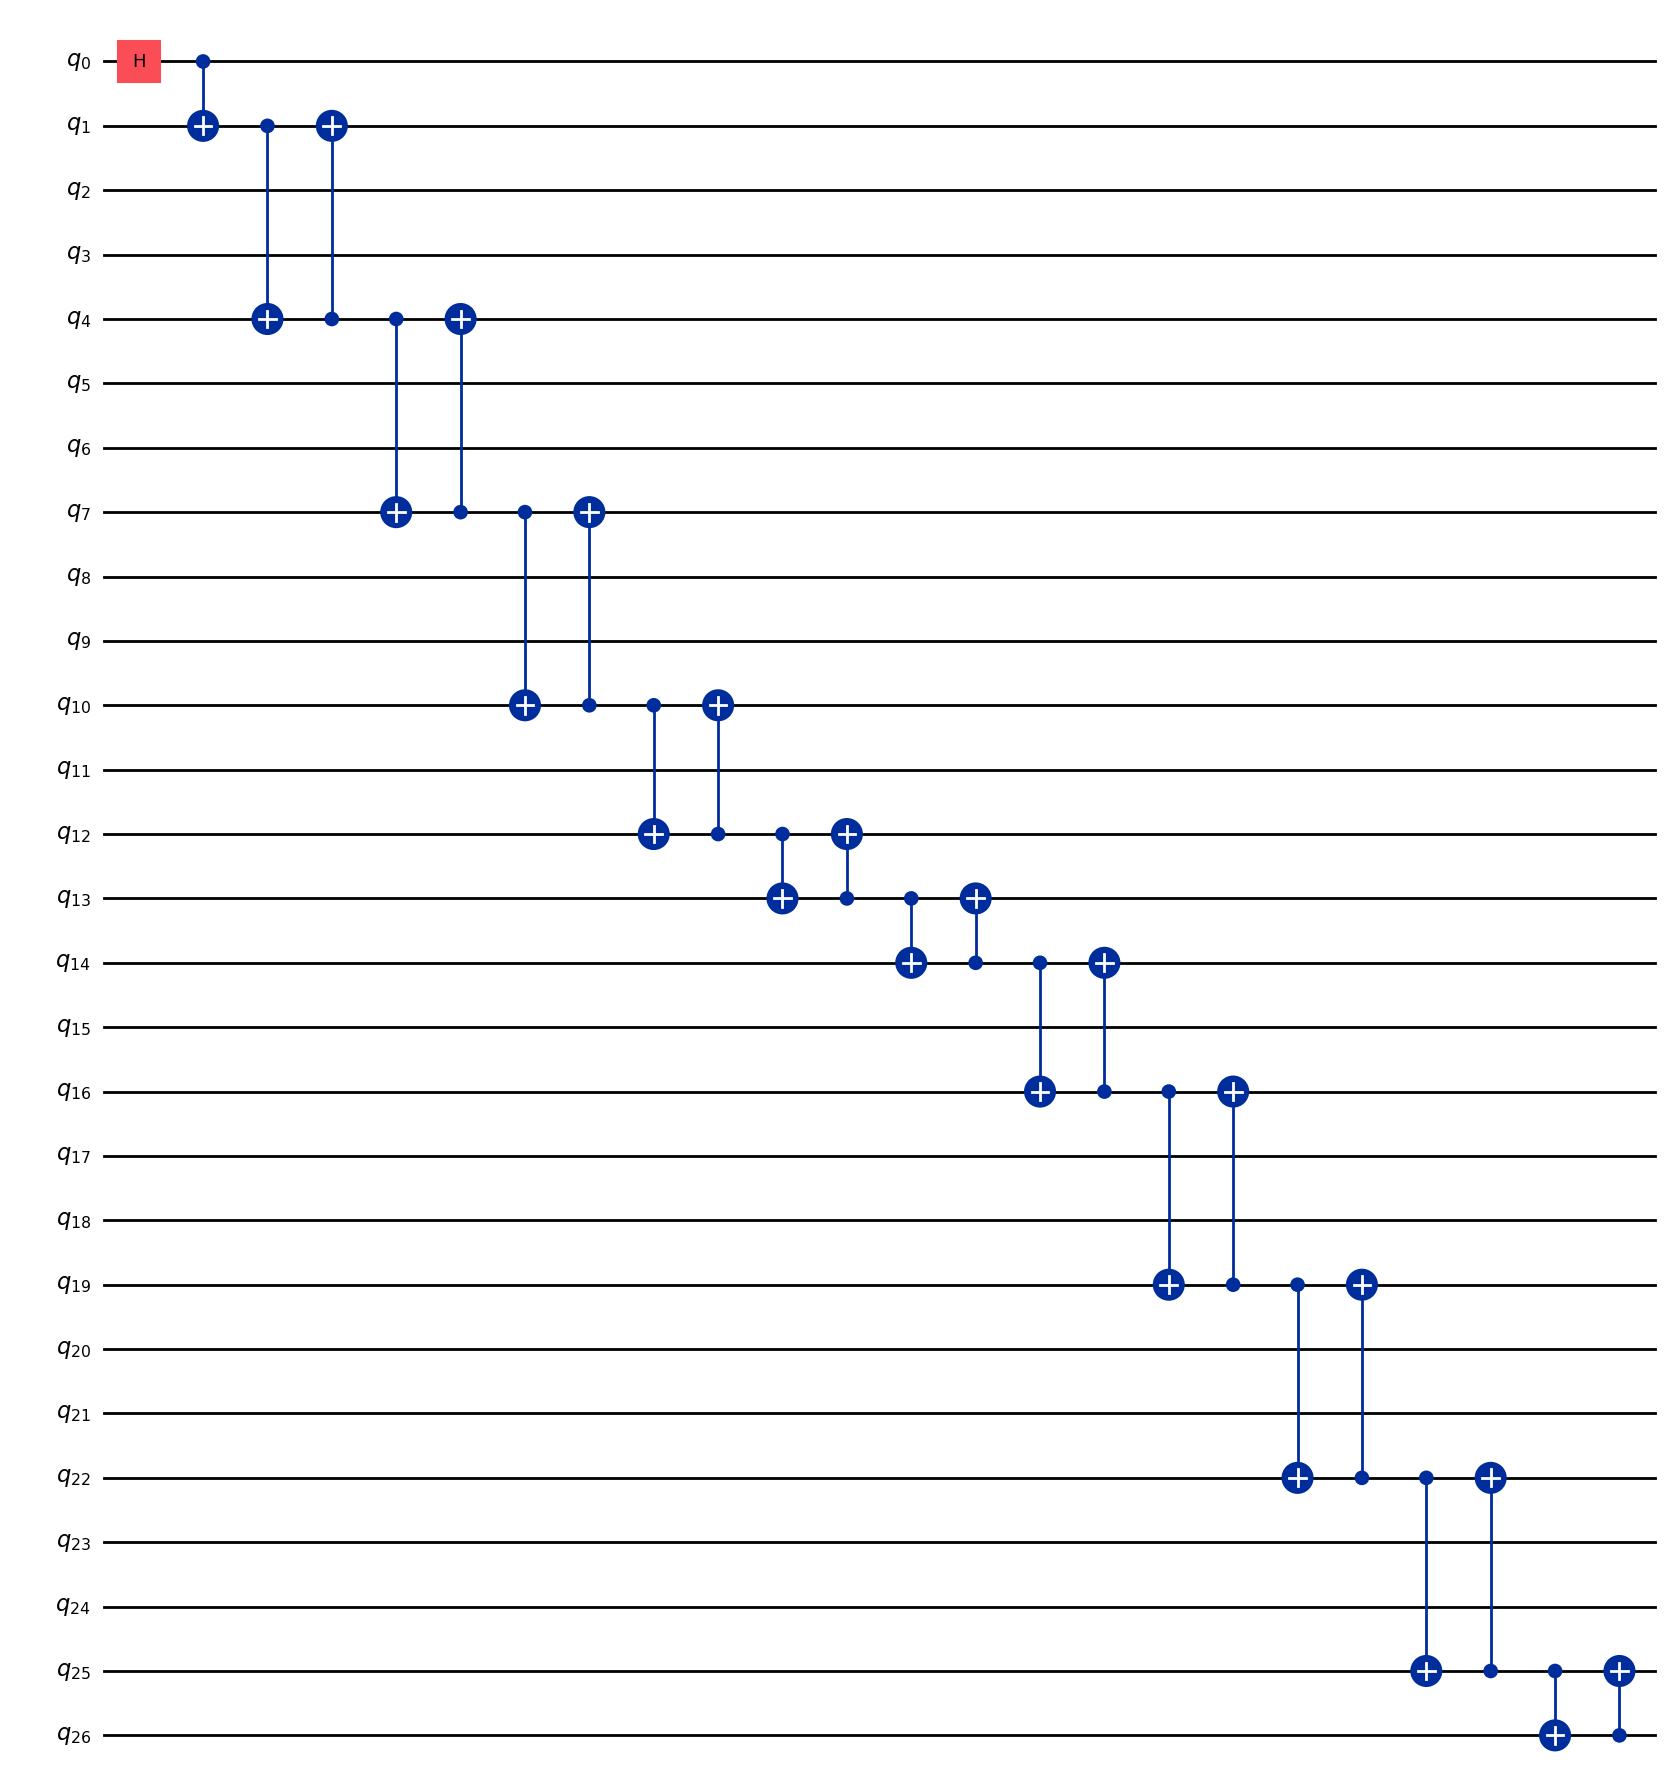

In [58]:
# SUBMISSION CELL
from qiskit import QuantumCircuit


suivant = {0:1, 1:4, 4:7, 7:10, 10:12, 12:13, 13:14, 14:16, 16:19, 19:22, 22:25, 25:26}
chemin = [1, 4, 7, 10, 12, 13, 14, 16, 19, 22, 25]


qc = QuantumCircuit(27)
qc.h(0)
qc.cx(0,1)
for qubit in chemin:
	qc.cx(qubit, suivant[qubit])
	qc.cx(suivant[qubit], qubit)

qc.draw("mpl")

#l'execution du score prend du temps 

In [60]:
# SCORING CELL

import numpy as np
from qiskit import QuantumCircuit
from qiskit.transpiler import generate_preset_pass_manager
from qiskit.quantum_info import Statevector
# Pass check_correctness=False if yo know your circuit works and you want to test its depth more quickly
def test_cnot_optimization(qc: QuantumCircuit, check_correctness=True) -> int:
    pm = generate_preset_pass_manager(
        backend=backend,
        optimization_level=2,
        seed_transpiler=SEED,
        layout_method="trivial",
        routing_method="none"
    )
    index = (1 << 26) + 1

    if check_correctness:
        sv = Statevector(qc).data
        assert np.allclose(sv[0], sv[index], atol=1e-10, rtol=1e-10), "The circuit doesn't produce the right state."
        sv[0] = 0.
        sv[index] = 0.
        assert np.allclose(sv, 0., atol=1e-10, rtol=1e-10), "The circuit doesn't produce the right state."

    return pm.run(qc).depth()

test_cnot_optimization(qc, True)

26

# 5. The missing link

You have access to a 5-qubit quantum computer which has the following connectivity graph

<center><img src="images/custom_layout.png" /></center>

Each of the connections to qubit $4$ are perfect, e.g. a two-qubit gate between qubit $x \in \{0,1,2,3\}$ and qubit $4$ will function normally. However, exactly \textbf{one} of the remaining four connections is missing: if you try to apply a two-qubit gate to the two qubits associated with this connection then the gate will just act like the identity. Unfortunately, everyone has forgotten which connection is missing... For example, if the missing connection is the one between qubits $0$ and $1$, then the actual layout of the quantum computer is

<center><img src="images/custom_layout_missing_link.png" /></center>

Your goal is to create the first Bell state $\frac{\ket{00}+\ket{11}}{\sqrt{2}}$ between the two qubits at each end of the faulty connection. Taking back the example above, it would mean that the state you have to create is, using Qiskit little-endian's convention
$$\frac{\ket{00000}+\ket{00011}}{\sqrt{2}}\,.$$
However, you don't know which connection is faulty! You are allowed some tests on the device beforehand to learn a bit about it. Your goal is to manage to create this Bell state with as few tests beforehand as possible.

More specifically, your goal is to write a function that first calls the `learn` function as much as you'd like. This function takes a `QuantumCircuit` as input and runs it on the device before returning the results of a `Sampler` to you. Once you think you've learned enough, the function then calls returns a `QuantumCircuit` that creates the first Bell state between the two qubits at each end of the faulty connection.

### Marking criteria

We will test your code on the four different architectures. Your score will be given by
$$\frac14\sum_i\left|\left\langle\varphi_i\middle|\psi_i\right\rangle\right|^2$$
with $|\psi_i\rangle$ being the Bell state you're supposed to create, and $\ket{\varphi_i}$ the state you actually create. In case of a tie, the tiebreaker will be the number of times you used the `learn` function for a given instance, lower is better, and then the depth of the circuit creating the Bell state, lower is better.

In [28]:
# THIS CELL IS PART OF THE SCORING CODE, DO NOT MODIFY IT

import numpy as np
from qiskit import QuantumCircuit
from qiskit.primitives import StatevectorSampler, SamplerPubResult
from qiskit.quantum_info import Statevector

def remove_faulty(qc: QuantumCircuit, missing_link: tuple[int, int]) -> None:
    """Remove every two-qubit gate applied on the specified missing link in place."""
    
    to_remove = []
    missing_link = set(missing_link)
    for index, instruction in enumerate(qc.data):
        if set([qc.find_bit(q).index for q in instruction.qubits]) == missing_link:
            to_remove.append(index)

    offset = 0
    for index in to_remove:
        del qc.data[index - offset]
        offset += 1

def learn(qc: QuantumCircuit) -> dict['str': int]:
    """Return the result of running a given `QuantumCircuit` on a backend missing the `missing_link` connection.

    This function will return the binary counts when running a `QuantumCircuit` on a backend
    missing the `missing_link` connection. Note that it uses qiskit's little-endian. It assumes
    all the measures are performed onto the same classical register.
    """
    assert qc.num_qubits == 5, "The circuit must contain exactly 5 qubits."
    global learn_used
    learn_used += 1
    
    sampler = StatevectorSampler()
    copied_qc = qc.copy()
    remove_faulty(copied_qc, missing_link)
    job = sampler.run([copied_qc])
    res = job.result()[0]
    
    return getattr(res.data, copied_qc.cregs[0].name).get_counts()

In order to help you understand how to use the learn function we provide an example below which you can delete and replace by your submission. In the example, we construct a test to check whether the (0,1) connection is missing. If the connection is missing then we create the desired Bell state. If the connection is not missing then we create an entangled state on all 5 qubits.

In [38]:
from qiskit import QuantumCircuit

def missing_link_function() -> QuantumCircuit:
    # YOUR CODE HERE
    # The following is just an example to get you used to the learn function
    
    # First, let us find which connection is missing with this circuit :
    qc = QuantumCircuit(5)
    qc.x(0)
    qc.cx(0, 1)
    qc.x(2)
    qc.cx(2,3)
    qc.cx(1,2)
    qc.cx(3,0)
    
    # Measure only for the learn function, not for the circuit you return!
    qc.measure_all()
    counts = learn(qc)

    if list(counts.keys())[0][4-1] == '0':
        i,j = 0,1
     
    elif list(counts.keys())[0][4-3] == '0':
        i,j = 2,3

    elif list(counts.keys())[0][4-2] == '1':
        i,j = 1,2

    elif list(counts.keys())[0][4-0] == '1':
        i,j = 3,0
    

    # If we've measured a single 1, then the CX gate hasn't been applied, so we've found
    #  the faulty connection
    qc = QuantumCircuit(5)
    qc.h(i)
    qc.cx(i, 4)
    qc.cx(4, j)
    qc.cx(j, 4)

    return qc


In [39]:
# SCORING CELL

from collections.abc import Callable

def test_missing_link(user_function: Callable[[], QuantumCircuit]) -> tuple[int, float]:
    global learn_used
    global missing_link
    
    learn_used = 0
    depth = 0
    fidelity = 0
    for missing_link in [(0, 1), (1, 2), (2, 3), (3, 0)]:
        bell_circuit = missing_link_function()        
        remove_faulty(bell_circuit, missing_link)
        bell_state = np.zeros(1 << 5)
        index = (1 << missing_link[0]) + (1 << missing_link[1])
        bell_state[0] = 1 / np.sqrt(2)
        bell_state[index] = 1 / np.sqrt(2)
        bell_state = Statevector(bell_state)
        depth += bell_circuit.depth()
        fidelity += np.abs(bell_state.inner(Statevector(bell_circuit))) ** 2

    return fidelity / 4, learn_used, depth / 4

fidelity, learn_used, avg_depth = test_missing_link(missing_link_function)
print(f"Average fidelity: {fidelity:.3f}, Number of uses of the learn function: {learn_used}. Average depth: {avg_depth:.3f}.")

Average fidelity: 1.000, Number of uses of the learn function: 4. Average depth: 4.000.


# 6. Order, order

You are given two single-qubit gates $U_1$ and $U_2$ and you are promised two things:
 1. They either commute ($U_1U_2 = U_2 U_1$), or they anti-commute ($U_1U_2 = - U_2U_1$).
 2. $U_2 U_1 \ket{0} = \ket{1}$

Your goal is to determine whether the gates commute or anticommute.

More specifically you will submit a `QuantumCircuit` that can use $U_1$, $U_2$, their controlled version and any of the standard gates. The following cell defines two parametrized gates `U1` and `U2` that you must use in your `QuantumCircuit`.

In [40]:
# THIS CELL IS PART OF THE SCORING CODE

import numpy as np
from qiskit.circuit import Parameter, QuantumCircuit
from qiskit.circuit.library import UGate, GlobalPhaseGate

theta1 = Parameter(r"$\theta_1$")
phi1 = Parameter(r"$\varphi_1$")
lam1 = Parameter(r"$\lambda_1$")
mu1 = Parameter(r"$\mu_1$")
qc_u1 = QuantumCircuit(1)
qc_u1.u(theta1, phi1, lam1, 0)
qc_u1.append(GlobalPhaseGate(mu1))
U1 = qc_u1.to_gate(label=r"$U_1$")

theta2 = Parameter(r"$\theta_2$")
phi2 = Parameter(r"$\varphi_2$")
lam2 = Parameter(r"$\lambda_2$")
mu2 = Parameter(r"$\mu_2$")
qc_u2 = QuantumCircuit(1)
qc_u2.u(theta2, phi2, lam2, 0)
qc_u2.append(GlobalPhaseGate(mu2))
U2 = qc_u2.to_gate(label=r"$U_2$")

Remember that you can use these gates, their inverse and their controlled versions like so:

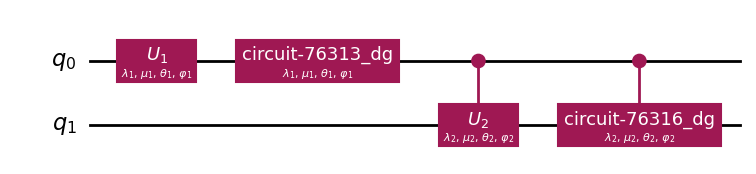

In [41]:
qc = QuantumCircuit(2)
qc.append(U1, [0])
qc.append(U1.inverse(), [0])
qc.append(U2.control(), [0, 1])
qc.append(U2.control().inverse(), [0, 1])
qc.draw("mpl")

The state $\ket{00}$ will be input to your circuit and then the qubit numbered 0 (that is, the top one) will be measured. If the outcome of the measurement is $0$, you will guess that the gates commute and if the outcome is $1$ then you will guess that the gates anticommute.

### Marking criteria
Your circuit will be tested on random sets of commuting and anticommuting gates and the fraction of times that your guess is correct will be computed. We will then rank your submissions by your success probability (higher is better). In the event of a tiebreak, we will count the number of queries to the gates $U_1$, $U_2$ in your circuit (lower is better).

In [43]:
# SUBMISSION CELL

qc = QuantumCircuit(2)
qc.h(0)
qc.append(U1.control(),[0,1])
qc.append(U2,[1])
qc.append(U1.inverse().control(),[0,1])
qc.h(0)

In [44]:
# SCORING CELL

from collections.abc import Callable

import numpy as np
from qiskit.quantum_info import Statevector
from tqdm.notebook import trange

def test_commutativity_test(qc: QuantumCircuit, N: int = 10_000) -> tuple[float, int]:
    success = 0
    gen = np.random.default_rng(seed=SEED)

    for _ in trange(N):
        # Parameters for commuting U1 and U2
        beta1, beta2, alpha = 2 * np.pi * gen.uniform(size=3)
        qc_assigned = qc.assign_parameters(
            {
                mu1: (beta1 + beta2) / 2,
                lam1: (alpha - np.pi) / 2,
                theta1: beta1 - beta2,
                phi1 : (np.pi - alpha) / 2,
                mu2: (np.pi + alpha - beta1 - beta2) / 2,
                theta2: np.pi - beta2 + beta1,
                phi2: -(np.pi + alpha) / 2,
                lam2: (alpha + np.pi) / 2
            }
        )
        sv = Statevector(qc_assigned).data
        probs = np.abs(sv) ** 2
        success += probs[0] + probs[2]

        # Parameters for anticommuting U1 and U2
        beta1, beta2 = 2 * gen.random(size=2) * np.pi
        # We apply sqrt so that measuring 0 or 1 has equal probability
        rho = np.sqrt(gen.random())
        qc_assigned = qc.assign_parameters(
            {
                mu1: beta1,
                lam1: beta2 - beta1,
                theta1: -2 * np.acos(rho),
                phi1 : np.pi - beta2 + beta1,
                mu2: beta2-2*beta1,
                theta2: np.pi + 2 * np.acos(rho),
                phi2: beta1 - beta2,
                lam2: -(np.pi - beta2 + beta1)
            }
        )
        sv = Statevector(qc_assigned).data
        probs = np.abs(sv) ** 2
        success += probs[1] + probs[3]

    n_uses = 0
    for instruction in qc.data:
        if instruction.operation in [U1, U2, U1.control(), U2.control()]:
            n_uses += 1

    return success / (2 * N), n_uses

p_success, n_uses = test_commutativity_test(qc)
print(f"Probability of success: {p_success:.3f}. Number of uses: {n_uses}.")

  0%|          | 0/10000 [00:00<?, ?it/s]

Probability of success: 1.000. Number of uses: 2.


# 7. Learning the unknown

You are given an unknown state of two qubits $\ket{\psi}$. You are also promised that this two-qubit state takes the form
$$\ket{\psi} = \ket{v^\perp} \otimes \ket{v}$$
where $\ket{v} = \alpha \ket{0} + \beta \ket{1}$ and $\ket{v^{\perp}} = \gamma \ket{0} + \delta \ket{1}$ are qubit states that are orthogonal, i.e. $\left\langle v\middle|v^{\perp}\right\rangle = 0$. Your goal is to design a collection of quantum circuits to try to learn the state vector (i.e., estimate the parameters $(\alpha, \beta, \gamma, \delta) \in \mathbb{C}^4$). However, due to time limitations you are allowed to run at most $24000$ shots before you must guess $(\alpha, \beta, \gamma, \delta)$. You can however, divide these shots between multiple circuits.

Your submission will consist of a list of `QuantumCircuit` and a function which defines how you interpret the frequency distributions output from those circuits to guess the statevector. Each `QuantumCircuit` in your list wil be prepared in the state $\ket{\psi}$ on the qubits numbered $0$ and $1$, while the other qubits are initialized to $\ket{0}$. Your circuits musn't include any measurement gates, every qubit will be measured. Note that if you choose to define multiple circuits then the total shots will be split evenly amongst the circuits, e.g., if your list has 3 circuits then each circuit will be run for 8000 shots and the frequency distributions will be returned to you in a list of size 3, with each entry being the frequency distribution associated to a circuit.

### A note on Qiskit's little-endian convention
This question uses Qiskit's little-endian convention. In particular:
1. The qubit numbered $0$ is initialized in state $\ket{v}$.
2. The qubit numbered $1$ is initialized in state $\ket{v^\perp}$.


### Marking criteria

To test your submission we will generate $N=32$ random two-qubit states $\{\ket{\psi_i}\}_i$. Using your submitted circuits and function we will generate guesses of these states $\{\ket{\phi_i}\}_i$. We will then rank your submission using the metric (higher score is better):
$$\frac{1}{N}\sum_{i=1}^N\left|\left\langle\psi_i\middle|\varphi_i\right\rangle\right|^2\,.$$

In [46]:
# SUBMISSION CELL
from qiskit import QuantumCircuit


qc1 = QuantumCircuit(2)
 
qc2 = QuantumCircuit(2)
qc2.h(0)
qc2.h(1)

qc3 = QuantumCircuit(2)
qc3.t(0)
qc3.t(0)
qc3.t(0)
qc3.t(0)
qc3.t(0)
qc3.t(0)
qc3.h(0)
qc3.t(1)
qc3.t(1)
qc3.t(1)
qc3.t(1)
qc3.t(1)
qc3.t(1)
qc3.h(1)


circuits = [qc1, qc2, qc3]

# You can add as much circuits as you want, but don't change the name of this variable

# Don't modify the name of this function
import numpy as np

def guess_unknown(distributions: list[dict[str, float]]) -> tuple[complex, complex, complex, complex]:
    def exp_value(dist, qubit_index) :
        ev = 0.0
        for bitstr, prob in dist.items():
            bit = bitstr[-(qubit_index+1)]
            ev += (1 if bit == '0' else -1) * prob
        return ev
    E_Z = exp_value(distributions[0], 0)
    E_X = exp_value(distributions[1], 0)
    E_Y = exp_value(distributions[2], 0)
    r = np.array([E_X, E_Y, E_Z])
    norm = np.linalg.norm(r)
    if norm == 0:
        theta, phi = 0.0, 0.0
    else:
        r /= norm
        theta = np.arccos(r[2])
        phi = np.arctan2(r[1], r[0])
    alpha = np.cos(theta/2)
    beta = np.exp(1j * phi) * np.sin(theta/2)
    gamma = -np.exp(-1j * phi) * np.sin(theta/2)
    delta = np.cos(theta/2)
    return (alpha, beta, gamma, delta)


In [47]:
# SCORING CELL

from collections.abc import Callable

import numpy as np
from qiskit import QuantumCircuit
from qiskit.primitives import StatevectorSampler
from qiskit.quantum_info import random_unitary
from tqdm.notebook import trange

def test_learning_the_unknown(
    circuits: list[QuantumCircuit],
    guess: Callable[[list[dict[str, float]]], tuple[float, float, float, float]]
) -> float:
    n_circuits = len(circuits)
    n_shots_total = 24_000
    shots = [n_shots_total // n_circuits for i in range(n_circuits)]
    
    for i in range(n_shots_total % n_circuits):
        shots[i] += 1

    sampler = StatevectorSampler(seed=SEED)
    score = 0

    for i in trange(32):
        v, v_orth = random_unitary(2, seed=SEED+i).data
        psi = np.kron(v, v_orth)
        to_be_run = []
        
        for qc, n_shots in zip(circuits, shots):
            new_qc = QuantumCircuit(qc.num_qubits)
            new_qc.initialize(v, [0])
            new_qc.initialize(v_orth, [1])
            new_qc.compose(qc, inplace=True)
            new_qc.measure_all()
            to_be_run.append((new_qc, None, n_shots))

        result = sampler.run(to_be_run).result()
        guess_input = []

        assert len(result) == len(shots)
        for r, n_shots in zip(result, shots):
            d = r.data.meas.get_counts()

            for key, value in d.items():
                d[key] = value / n_shots

            guess_input.append(d)

        guessed = guess(guess_input)
        phi = np.array(guessed).astype("complex")
        phi[:2] /= np.linalg.norm(phi[:2])
        phi[2:] /= np.linalg.norm(phi[2:])
        score += (np.abs((phi[:2].conj() * v).sum()) ** 2) * (np.abs((phi[2:].conj() * v_orth).sum()) ** 2)

    return score / 32

print(f"Score: {test_learning_the_unknown(circuits, guess_unknown)}")

  0%|          | 0/32 [00:00<?, ?it/s]

Score: 0.9999708865238986


# 8. Better safe than sorry

A friend is sending you the bit value $b$ that opens a secret vault, you have no knowledge of this bit so $P[b=0]=P[b=1]=1/2$. Unfortunately, your friend is constrained by her communication system: she is only able to produce and send you one of two possible qubit states. If she wants to communicate $b=0$ then she will send $\ket{0}$ and if she wants to communicate $b=1$ then she will send $\ket{+} = \frac{1}{\sqrt{2}}\ket{0} + \frac{1}{\sqrt{2}} \ket{1}$. Unfortunately, if you input the wrong bit into the vault, all of its contents will be destroyed. You are allowed, however, to ask your friend to send you the message again. You would like to open the vault while limiting the number of messages from your friend, and you must make sure that the contents of the vault are not destroyed!
    
Your submission will consist of two objects: 
 1. A circuit that takes the qubit message of your friend and produces a classical outcome $x$. This circuit mustn't contain any measurement gates, the test function will take care of this.
 2. A function $f$ that interprets the classical outcome $x$ and returns $0$ if you want to input $b=0$ to the vault, $1$ if you want to input $b=1$ to the vault and $2$ if you want to request another copy of the message from your friend.

Note: you are allowed to use arbitrarily many extra ancillary qubits for your circuit, so the input $x$ to the function $f$ can be larger than one bit if you wish.

### Marking criteria

Let $p$ be the probability that your scheme requests another copy of the message from your friend. Let $(1-p)q$ be the probability that you make a wrong guess of the secret bit and destroy the vault. Your submission will be ranked first by the value of $q$ (lower is better) and then you will be ranked by the value of $p$ (again lower is better).
Finally, in case of a tie on $p$ and $q$, the number of ancillary qubits will be the final tie-breaker (lower is better). All the probabilities will be computed empirically using $f$, so $f$ doesn't necessarily have to be deterministic.

In [72]:
#SUBMISSION CELL

from qiskit import QuantumCircuit
from random import randint
from numpy import *

qc = QuantumCircuit(2)

maybe = randint(0,1)

if(maybe):
    qc.ry(np.pi/4, 0)
    qc.x(1)


def f(outcome) -> int:

    outcome = outcome.zfill(2)
    maybe = outcome[0]
    guess = outcome[1]
    if(maybe):
        if(not guess):
            return 0
        else:
            return 2
    else:
        if(guess):
            return 1
        else:
            return 2


In [73]:
# SCORING CELL

from collections.abc import Callable

import numpy as np
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
from tqdm.notebook import trange

def test_better_safe_than_sorry(qc: QuantumCircuit, f: Callable[[str], int], N:int = 1_000_000) -> tuple[float, float, int]:
    def get_p_and_q(init_state: np.ndarray, incorrect_bit: int) -> tuple[float, float]:
        new_qc = QuantumCircuit(qc.num_qubits)
        new_qc.initialize(init_state, [0])
        new_qc.compose(qc, inplace=True)

        probs = np.abs(Statevector(new_qc)) ** 2
        
        p = 0
        wrong_guess = 0
        
        for index, prob in enumerate(probs):
            for _ in trange(N, desc=f"Computing probabilities for index {index}...", leave=False):
                guess = f(bin(index)[2:])
                assert guess in [0, 1, 2], f"Incorrect return value: {guess}"
            
                if guess == 2:
                    p += prob
            
                if guess == incorrect_bit:
                    wrong_guess += prob

        p /= N
        wrong_guess /= N
        
        q = wrong_guess / (1 - p)

        return p, q

    p0, q0 = get_p_and_q(np.array([1., 0.]), 1)
    p1, q1 = get_p_and_q(np.array([1., 1.]) / np.sqrt(2), 0)

    return (q0 + q1) / 2, (p0 + p1) / 2, qc.num_qubits - 1

q, p, ancilla_qubits = test_better_safe_than_sorry(qc, f)
print(f"{q=:.3f}, {p=:.3f}, Ancilla qubits: {ancilla_qubits}")

Computing probabilities for index 0...:   0%|          | 0/1000000 [00:00<?, ?it/s]

Computing probabilities for index 1...:   0%|          | 0/1000000 [00:00<?, ?it/s]

Computing probabilities for index 2...:   0%|          | 0/1000000 [00:00<?, ?it/s]

Computing probabilities for index 3...:   0%|          | 0/1000000 [00:00<?, ?it/s]

Computing probabilities for index 0...:   0%|          | 0/1000000 [00:00<?, ?it/s]

Computing probabilities for index 1...:   0%|          | 0/1000000 [00:00<?, ?it/s]

Computing probabilities for index 2...:   0%|          | 0/1000000 [00:00<?, ?it/s]

Computing probabilities for index 3...:   0%|          | 0/1000000 [00:00<?, ?it/s]

q=0.000, p=1.000, Ancilla qubits: 1


# 9. A grasshopper on the Bloch sphere
A grasshopper sits somewhere on the surface of the Bloch Sphere, their initial location is represented by the quantum state $\ket{\psi_0}$. The grasshopper then picks a random direction and jumps a **fixed** distance $L > 0$ landing at a new spot on the surface of the sphere which we represent by the state $\ket{\psi_1}$. The distance $L$ is unknown but $L$ is such that the grasshopper **cannot** jump to the other half of the sphere. In other words, the angle between $\ket{\psi_0}$ and $\ket{\psi_1}$ as vectors on the sphere is at most $\pi/2$. After jumping once, the grasshopper will be reset to the point $\ket{\psi_0}$ and will be allowed to jump again (choosing again a random direction and jumping again the fixed distance $L$). This process will be repeated $m = 6000$ times, generating the collection of states 
$$\mathcal{S} = \{\ket{\psi_1}, \ket{\psi_2}, \dots, \ket{\psi_{6000}}\}\,.$$
    
Your goal is to design a collection of quantum circuits to try to learn the grasshopper's starting location using each state in the collection $\mathcal{S}$ only once. Writing $\ket{\psi_0} = \alpha \ket{0} + \beta \ket{1}$ you should return your guess of $(\alpha, \beta)$. If you submit multiple circuits, then the states from the set $\mathcal{S}$ will be divided evenly between these circuits.

Your submission will consist of a list of `QuantumCircuit` and a function. The states $\mathcal{S}$ will be split amongst the `QuantumCircuit`, while the function takes in the frequency distributions from these circuits and returns the guess $(\alpha, \beta)$ of the coefficients of the starting state $\ket{\psi_0}$. Note that each state can be evaluated at most once. So, if you submit two `QuantumCircuit`, the first one will be individually applied to every state from $\ket{\psi_1}$ to $\ket{\psi_{3000}}$ and then immediately measured using a single shot, and similarly for the second for the states between $\ket{\psi_{3001}}$ and $\ket{\psi_{6000}}$. We will then pass to your function a list of two elements, each elements being the aggregated measurement outcomes for each circuit.

### Marking criteria
To test your submission we will generate $N=5$ random starting states $\ket{\phi_i^{\mathrm{starting}}}$ for the grasshopper. For each starting state we will then generate the set $\mathcal{S}$ on which we will test your submission. Using your submission we will generate guesses of each of the starting states, which we call $\{\ket{\phi_i^{\mathrm{guess}}}\}_i$. We will then rank your submission using the metric (higher score is better):
$$\frac{1}{N}\sum_{i=1}^N\left|\left\langle\phi_i^{\mathrm{starting}}\middle|\phi_i^{\mathrm{guess}}\right\rangle\right|^2.$$
Note that the same random states and $L$s will be used to test every team's submission.

In [74]:
# SUBMISSION CELL

from qiskit import QuantumCircuit
from qiskit.circuit.library import UnitaryGate
from random import uniform
import numpy as np
from math import *

N = 30
M = 30

circuits = []
for theta in np.arange(0, np.pi, np.pi/N):
    for phi in np.arange(0, 2*np.pi, 2*np.pi/M):
        qc = QuantumCircuit(1)
        #theta = uniform(0, np.pi)
        #phi = uniform(0, 2*np.pi)
        psi0 = [cos(theta/2), sin(theta/2)*(cos(phi) + sin(phi)*1j)]
        psi1 = [cos(np.pi/2 - theta/2), sin(np.pi/2 - theta/2)*(cos(np.pi + phi) + sin(np.pi + phi)*1j)]
        
        Uchangement_base = UnitaryGate(np.array([psi0, psi1]), label="Uchangement_base")
        
        qc.append(Uchangement_base, [0])
        
        circuits.append(qc)
    

# Don't modify the name of this function
def guess_grasshopper(distributions: list[dict[str, float]]) -> tuple[float, float]:
    """ Return the guess for (alpha, beta)
    
    This functions takes as input a list where its i-th element are the results of a Sampler
    ran on the i-th QuantumCircuit of `circuits`, normalized by the number of shots so that
    it forms a valid probability distribution. That is, the i-th element is a dict which keys
    are bitstrings, and values are probabilities.
    """
    moyenne = 0
    for i in range(N):
        for j in range(M):
            theta = i*np.pi/N
            psi = 2*j*np.pi/M  
            index = i*M + j
            psi0 = cos(theta/2) + sin(theta/2)*(cos(phi) + sin(phi)*1j)
            psi1 = cos(np.pi/2 - theta/2) + sin(np.pi/2 - theta/2)*(cos(np.pi + phi) + sin(np.pi + phi)*1j)

            moyenne += (float(distributions[index].get('0', 0)) + 0.5) ** 100 * psi0
            moyenne += (float(distributions[index].get('1', 0)) + 0.5) ** 100 * psi1

    module = abs(moyenne)
    
    resultat = moyenne / module

    return resultat.real, resultat.imag


In [ ]:
# SCORING CELL

from collections.abc import Callable

import numpy as np
from qiskit import QuantumCircuit
from qiskit.quantum_info import Operator, random_unitary, Statevector
from qiskit.circuit.library import RYGate, RZGate
from qiskit.primitives import StatevectorSampler
from tqdm.notebook import trange, tqdm

def generate_states(
    shifting_unitary: Operator,
    seed: int,
    N: int = 6_000
):
    states = []
    gen = np.random.default_rng(seed=SEED)

    zero_state = Statevector.from_label("0")
    L = np.pi * gen.random() / 2
    ry = RYGate(L)

    for _ in trange(N, leave=False, desc="Generating states..."):
        # Put it on the right ring
        new_state = zero_state.evolve(ry)
        # Randomize the position on the ring
        new_state = new_state.evolve(RZGate(2 * np.pi * gen.random()))
        # Shift back around the starting state
        new_state = new_state.evolve(shifting_unitary)
        
        states.append(new_state)

    return states

def test_a_grasshopper_on_the_bloch_sphere(
    circuits: list[QuantumCircuit],
    guess: Callable[[list[dict[str, int]]], tuple[float, float, float, float]],
    N: int = 5
) -> float:
    n_circuits = len(circuits)
    n_shots_total = 6_000
    shots = [n_shots_total // n_circuits for i in range(n_circuits)]
    
    for i in range(n_shots_total % n_circuits):
        shots[i] += 1

    sampler = StatevectorSampler()
    score = 0

    for i in trange(N, desc=f"Testing on {N} different states..."):
        shifting_unitary = random_unitary(2, seed=SEED+i)
        gen = np.random.default_rng(seed=SEED+i)
        state_generator = generate_states(shifting_unitary, SEED+i)
        result = []
        
        for qc, n_shots in tqdm(zip(circuits, shots), total=n_circuits, leave=False, desc="Creating statistics for the different circuits..."):
            counts = np.zeros(1 << qc.num_qubits, dtype=int)
            to_be_run = []
            
            for i, init_state in tqdm(zip(range(n_shots), state_generator), total=n_shots, leave=False, desc="Creating the initialized circuits..."):
                new_qc = QuantumCircuit(qc.num_qubits)
                new_qc.initialize(init_state, [0])
                new_qc.compose(qc, inplace=True)
                new_qc.measure_all()
                to_be_run.append((new_qc, None, 10))

            temp_results = sampler.run(to_be_run).result()

            for r in temp_results:
                counts[list(r.data.meas.get_int_counts().items())[0][0]] += 1

            result.append({bin(index)[2:]:value/n_shots for index, value in enumerate(counts)})

        guessed = guess(result)
        phi = np.array(guessed)
        score += np.abs((phi.conj() * shifting_unitary.data[:, 0]).sum()) ** 2

    return score / N

print(f"Score: {test_a_grasshopper_on_the_bloch_sphere(circuits, guess_grasshopper, 5):.3f}")

Testing on 5 different states...:   0%|          | 0/5 [00:00<?, ?it/s]

Generating states...:   0%|          | 0/6000 [00:00<?, ?it/s]

Creating statistics for the different circuits...:   0%|          | 0/900 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Generating states...:   0%|          | 0/6000 [00:00<?, ?it/s]

Creating statistics for the different circuits...:   0%|          | 0/900 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Generating states...:   0%|          | 0/6000 [00:00<?, ?it/s]

Creating statistics for the different circuits...:   0%|          | 0/900 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/6 [00:00<?, ?it/s]

Generating states...:   0%|          | 0/6000 [00:00<?, ?it/s]

Creating statistics for the different circuits...:   0%|          | 0/900 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

Creating the initialized circuits...:   0%|          | 0/7 [00:00<?, ?it/s]

# 10. Hidden in plain sight

During the TD, you encountered *qubit bleaching*, given by the 3-qubit circuit
<center><img src="images/target.png" /></center>

where
$$U = \ketbra{00}{00} \otimes \mathbb{1} + \ketbra{10}{10} \otimes X + \ketbra{01}{01} \otimes iY + \ketbra{11}{11} \otimes Z \,.$$
If it helps, this is the way $U$ will be implemented:

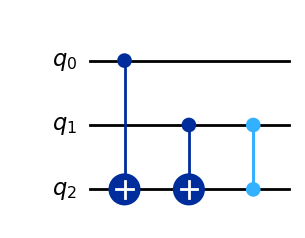

In [54]:
from qiskit import QuantumCircuit

U = QuantumCircuit(3)
U.cx(0, 2)
U.cx(1, 2)
U.cz(1, 2)
U.draw("mpl")

As you saw, after application of this circuit, the bottom qubit contains no information anymore (in the sense that any measurement of it yields a balanced random outcome). Your task is now to *unbleach* by recovering the input $\ket{\psi}$ only from operations on the top two qubits. 

Your submission will consist in a quantum circuit that starts with two qubits only (but it may use ancillary qubits), that only uses the elementary gates $H$, $T$ and $CNOT$ an no measurement gate. The point of it is that, when applied on the top two qubits after the bleaching circuit, the state of the top qubit (i.e. the one numbered $0$) should contain as much information about $\ket{\psi} = \alpha\ket{0} + \beta\ket{1}$ as possible.

### Marking criteria
To test your function we will generate $N=32$ random qubit states $\{\ket{\psi_i}\}_i$. Using your submitted functions we will generate guesses of these states $\{\ket{\phi_i}\}_i$, with $\ket{\phi_i}$ being the state of the topmost qubit when the input was $\ket{\psi_i}$. If the first qubit is entangled with others, we will measure them and use the collapsed state, averaging over the probabilities of collapsing onto this certain state. We will then rank your submission using the metric (higher score is better):
$$\frac{1}{N}\sum_{i=1}^N\left|\left\langle\psi_i\middle|\varphi_i\right\rangle\right|^2.$$

In case of ties, the number of ancillary qubits used then the number of elementary gates used will be used as tie-breakers (lower is better for both).

In [55]:
# SUBMISSION CELL

from qiskit import QuantumCircuit

unbleaching = QuantumCircuit(2)
unbleaching.cx(0, 1)
unbleaching.h(0)
unbleaching.cx(0, 1)

unbleaching.h(1)
unbleaching.cx(0, 1)
unbleaching.h(1)
    
unbleaching.cx(0, 1)
unbleaching.cx(1, 0)
unbleaching.cx(0, 1)

In [56]:
# SCORING CELL

from collections.abc import Callable

import numpy as np
from qiskit import QuantumCircuit, ClassicalRegister
from qiskit.circuit import Parameter
from qiskit.primitives import StatevectorSampler
from qiskit.quantum_info import partial_trace, random_statevector, Statevector, state_fidelity
from tqdm.notebook import trange

def test_hidden_in_plain_sight(unbleaching: QuantumCircuit) -> [float, int, int]:
    num_gates = 0
    sampler = StatevectorSampler(seed=SEED)
    
    for instruction in unbleaching.data:
        if instruction.name not in ["h", "t", "cx"]:
            raise ValueError(f"Instruction {instruction.name} isn't permitted.")

        num_gates += 1

    score = 0
    assert unbleaching.num_qubits >= 2, "The unbleaching circuit must be defined over at least two qubits"

    for i in trange(32):
        new_qc = QuantumCircuit(3 + unbleaching.num_qubits - 2, 1)
        new_qc.h([0, 1])
        psi = random_statevector(2, seed=SEED+i)
        new_qc.initialize(psi, [2])
        # Bleaching
        new_qc.cx(0, 2)
        new_qc.cx(1, 2)
        new_qc.cz(1, 2)
        # Adding unbleaching circuit
        new_qc.compose(unbleaching, [0, 1] + list(range(3, 3 + unbleaching.num_qubits - 2)), inplace=True)
        state = Statevector(new_qc)
        phi = partial_trace(state, list(range(1, new_qc.num_qubits)))
        score += state_fidelity(phi, psi)

    return score / 32, unbleaching.num_qubits - 2, num_gates

score, ancilla_qubits, num_gates = test_hidden_in_plain_sight(unbleaching)
print(f"Score: {score:.3f}, Ancilla qubits: {ancilla_qubits}, Number of gates: {num_gates}.")

  0%|          | 0/32 [00:00<?, ?it/s]

Score: 1.000, Ancilla qubits: 0, Number of gates: 9.
